<a href="https://colab.research.google.com/github/LM1997610/Social_Networks/blob/main/Homework/HW_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <h1><center>Social Networks and Online Markets</center></h1>
## <h2><center>Homework 1</center></h2>
## <h4><center>2023/2024</center></h4>
## <h3><center>Luca Mazzucco: 1997610</center></h3>

In [1]:
import os
import sys

import random
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

from IPython.display import Image
from collections import Counter, defaultdict

from tqdm.auto import tqdm

In [2]:
! git clone -q https://github.com/LM1997610/Social_Networks

In [3]:
if os.getcwd().split('/')[-1] != 'Social_Networks':
  os.chdir('Social_Networks/Homework')

## 1) The Barabassi-Albert Preferential Attachment Model:

Generalization of the model where a node is selected at time $ t+1 $ with probability that is proportional to its degree plus a constant $c$,\
Node *u* is selected with probability:

$$ \frac{{d_u + c}}{{\sum\limits_{\substack{w \in V_{t-1}}}(d_w + c)}} = \frac{{d_u +c}}{{(t-1)(2\ell +c)}}$$




Need to define:
- $ n_k(t) $: mean number of nodes at time $t$ with degree $k$
- $ p_k(t) = \frac{n_k(t)}{t} $: mean ratio of nodes at time t with degree $k$ <br/><br/>

For $ k > \ell $ we have:

$$ n_k(t+1)=n_k(t)+n_{k-1}(t)\frac{k+c-1}{(2\ell+c)t}\ell -n_k(t) \frac{k+c}{(2\ell+c)t}\ell $$
<br/><br/>
$$ (t+1)p_k(t+1)=t p_k(t) +p_{k-1}(t)\frac{k+c-1}{2\ell+c}\ell -p_k(t)\frac{k+c}{2\ell+c}\ell $$

From which we get:

$$ p_k = p_{k-1} \frac{k-1+c}{k+2+c+c/ℓ} $$

For $ k = \ell $:

$$ p_{\ell} = \frac{2+c/ℓ}{\ell+2+c+c/ℓ} $$

Bringing them together for $ k \ge \ell $:

$$ p_k = \frac{2+c/ℓ}{(k+2+c+c/ℓ)} \frac{\ell+c}{(k+3+c+c/ℓ)} \frac{\ell+c+1}{(k+4+c+c/ℓ)}  $$
<br/><br/>
This shows that the degree distribution when t → $\infty$ is approximately a power law with exponent $3 + c/ℓ $


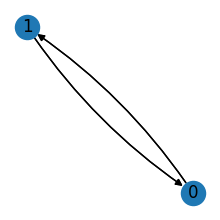

In [4]:
## Quick simulation:

G = nx.MultiDiGraph()

G.add_node('0')
G.add_node('1')

G.add_edge('0', '1'); G.add_edge('0', '1')
G.add_edge('1', '0'); G.add_edge('1', '0')

pos = nx.spring_layout(G)

plt.figure(figsize=(2, 2))

nx.draw(G, pos, with_labels=True, connectionstyle='arc3, rad = 0.1')

plt.show()

In [5]:
def prob_each_node(graph, time, l=4, c=0):

  degrees = dict(graph.degree())
  denominator = (time - 1)*(2*l + c)
  my_prob_list = [(x+c)/denominator for x in list(degrees.values())]

  return my_prob_list

In [6]:
c = 7
l = 4

times = range(2, 10000)

for t in tqdm(times):

  G.add_node(t)
  prob_vector = prob_each_node(G, time=t, l=l, c=c)
  selected_nodes = random.choices(list(G.nodes()), weights=prob_vector, k=4)

  for node in selected_nodes:
    G.add_edge(t, node)


  0%|          | 0/9998 [00:00<?, ?it/s]

In [7]:
degree_distrib = nx.degree_histogram(G)
nodes = [i for i in range(0, len(degree_distrib))]

degree_distrib = [degree_distrib[i]/G.number_of_nodes() for i in range(len(degree_distrib))]

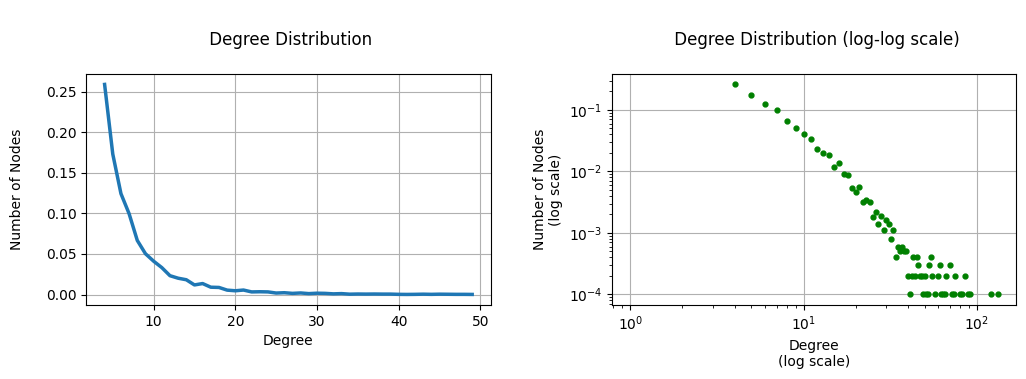

In [8]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(12, 3))

ax1.plot(nodes[l:50], degree_distrib[l:50], '-', linewidth=2.5)
ax1.set_title('\n Degree Distribution\n')
ax1.set_xlabel('Degree\n')
ax1.set_ylabel('Number of Nodes\n')
ax1.grid()

ax2.plot(nodes, degree_distrib, 'o', markersize=3.5, color='green')
ax2.set_title('\n Degree Distribution (log-log scale)\n')
ax2.set_xlabel('Degree\n(log scale)')
ax2.set_ylabel('Number of Nodes\n(log scale)')
ax2.set_xscale("log"); ax2.set_yscale("log")
ax2.grid()

plt.subplots_adjust(wspace=0.3)
plt.show()

In [9]:
! pip -q install powerlaw

In [10]:
import powerlaw as pwl

In [11]:
%%capture
fit_function = pwl.Fit(list(dict(G.degree()).values()))

In [12]:
print( round(fit_function.power_law.alpha, 2), 3+c/l )

3.91 4.75


## 2) Densest subgraph, Min-cut and Sparsest-cut:


In [13]:
from visualize import fixed_position, show_mincut, show_sparsest_cut

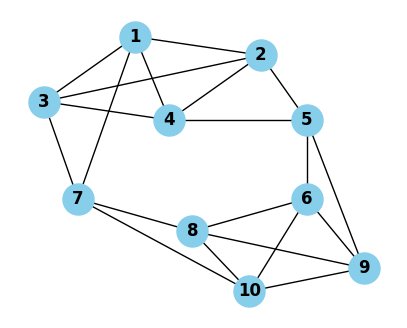

In [14]:
number_of_nodes = 10

G = nx.Graph()
G.add_nodes_from(range(1, number_of_nodes))

edges = [(1, 2), (1, 3), (1, 4), (1, 7),
         (2, 3), (2, 4), (2, 5),
         (3, 4), (3, 7),
         (4, 5),
         (5, 6), (5, 9),
         (6, 8), (6, 9), (6, 10),
         (7, 8), (7, 10),
         (8, 9), (8, 10),
         (9, 10)]

G.add_edges_from(edges)

pos = nx.spring_layout(G, pos=fixed_position, fixed = fixed_position.keys())

fig, ax = plt.subplots(figsize=(5,4))

nx.draw(G, with_labels=True, ax=ax, pos=pos,
        node_color='skyblue', font_color='black', font_weight='bold', font_size=12, node_size=500)

In [15]:
d_distrib = dict(G.degree())

print(f"Degree distribution: {d_distrib}")

Degree distribution: {1: 4, 2: 4, 3: 4, 4: 4, 5: 4, 6: 4, 7: 4, 8: 4, 9: 4, 10: 4}


In [16]:
adj_matrix = nx.to_numpy_array(G)

print(f'Adjacency matrix A → shape={adj_matrix.shape}:\n')
print(f'{adj_matrix}')

Adjacency matrix A → shape=(10, 10):

[[0. 1. 1. 1. 0. 0. 1. 0. 0. 0.]
 [1. 0. 1. 1. 1. 0. 0. 0. 0. 0.]
 [1. 1. 0. 1. 0. 0. 1. 0. 0. 0.]
 [1. 1. 1. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 1. 0. 1. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0. 0. 1. 1. 1.]
 [1. 0. 1. 0. 0. 0. 0. 1. 0. 1.]
 [0. 0. 0. 0. 0. 1. 1. 0. 1. 1.]
 [0. 0. 0. 0. 1. 1. 0. 1. 0. 1.]
 [0. 0. 0. 0. 0. 1. 1. 1. 1. 0.]]


Given an undirected graph $G=(V, E)$ finding the **densest subgraph**:\
Find a set $S ⊆ V$ that maximizes $f(S)$:

$$ f(S) = \frac{|E(S)|}{|S|} $$

where $E(S) = \{{u, v} ∈ E : u ∈ S, v ∈ S\}$ is the set of edges of the graph with both endpoints in $S$.

Greedy algorithm gives  a 2-approximation to the optimal solution:

In [17]:
def GreedyDensestSubgraph(Graph):

    print(f"Nodes in G: {set(G.nodes())}\n")

    S = set(Graph.nodes())
    sub_graph = set(Graph.nodes())

    while len(S) > 1:

        v_node = min(S, key=lambda v: Graph.subgraph(S).degree(v))

        S.remove(v_node)

        density_S = len(Graph.subgraph(S).edges()) / len(S)
        density_subgraph = len(Graph.subgraph(sub_graph).edges()) / len(sub_graph)

        if density_S >= density_subgraph:
          sub_graph = set(S)
          print(f" removed node: {str(v_node)}")

    print(f"\nDensest SubGraph: {sub_graph}")
    return sub_graph

In [18]:
densest_sgraph = GreedyDensestSubgraph(G)

## No significant output... Given the structure of this graph, the algorithm did not find any denser subgraph.

Nodes in G: {1, 2, 3, 4, 5, 6, 7, 8, 9, 10}


Densest SubGraph: {1, 2, 3, 4, 5, 6, 7, 8, 9, 10}


The **min-cut** is the problem of finding a cut $(C_1, C_2)$ that *minimizes* $|E(C_1, C_2)|$ representing the number of edges\
between the two sets $C_1$ and $C_2$ (size of the cut):

$$ E(C_1, C_2) = \{(i, j) ∈ E : i ∈ C_1, j ∈ C_2\} $$


Implementation of **Karger's algorithm**: a randomized algorithm that contracts edges between pairs of vertices until the graph is reduced to only two nodes. The probability of finding the minimum cut grows with multiple executions (here executed 20 times)

In [19]:
def contract_edge(graph_dict, node_a, node_b):

  for node in graph_dict[node_b]:

    if node != node_a:
      graph_dict[node_a].append(node)
      graph_dict[node].append(node_a)

    graph_dict[node].remove(node_b)

  graph_dict.pop(node_b)

  return graph_dict

def karger_min_cut(graph_dict):

  while len(graph_dict) > 2:

    v = random.choice(list(graph_dict.keys()))
    w = random.choice(graph_dict[v])

    graph_dict = contract_edge(graph_dict, v, w)

  return graph_dict


 Min-cut: {3: [6, 6, 6, 6], 6: [3, 3, 3, 3]} 

 Minimun Cut size: 4 



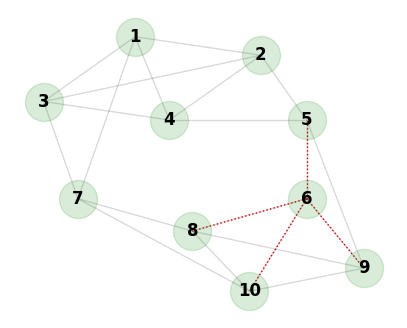

In [20]:
all_results = []

for i in range(20):

  G_dict = {node: list(G[node]) for node in G}

  this_cut = karger_min_cut(G_dict)

  all_results.append(this_cut)

min_cut = min(all_results, key=lambda d: len(next(iter(d.values()))))

print(f'\n Min-cut: {min_cut} \n')
print(f' Minimun Cut size: {len(list(min_cut.values())[0])} \n')

s2 = list(min_cut)[1]

show_mincut(G, G.edges(s2))

Given the structure of this particular graph, any single node cut represents a minimum cut. This is not always true for a general d-regular graph.


 Min-cut: {(9, 5), (4, 5), (2, 5), (6, 5)}

 Minimun Cut size: 4 



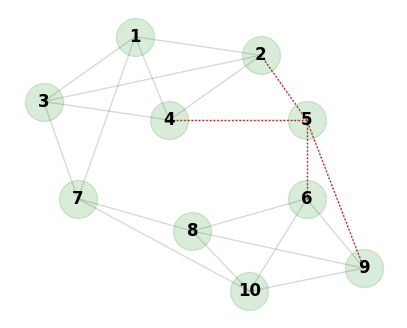

In [21]:
# Minimum cut with built-in function from Networkx:

print(f'\n Min-cut: {nx.minimum_edge_cut(G)}\n')

print(f' Minimun Cut size: {len(nx.minimum_edge_cut(G))} \n')

show_mincut(G, nx.minimum_edge_cut(G))

The **Sparsest-Cut**:

The sparsest cut is a cut $(C_1, C_2)$ that *minimizes*:
<br/><br/>

$$ \min_{\substack{C_1 \subset V \\ C_2 = V \setminus C_1}} \frac{|E(C_1, C_2)|}{\min\{|C_1|, |C_2|\}} $$ <br/><br/>

The goal is to split a graph into two sets of nodes in such a way that there are as few edges as possible crossing the partition\
while maximizing the number of vertices in each group.<br/><br/>

Compute conductance  $ϕ_{G}$ of the graph and $\lambda_2$ to show Cheeger’s inequalities hold:

In [22]:
min_conductance = float('inf')

for node in G.nodes():

    cut_size = nx.cut_size(G, {node}, set(G.nodes()) - {node})

    degree_C1 = sum(d_distrib[n] for n in G.neighbors(node))
    degree_C2 = sum(d_distrib[n] for n in G if n != node and n not in G.neighbors(node))

    this_conductance = cut_size / min(degree_C1, degree_C2)

    min_conductance = min(min_conductance, this_conductance)

print(f'\n Conductance of the Graph: {min_conductance}\n')


 Conductance of the Graph: 0.25



**Eigenvalues** and **eigenvectors** calculated with `numpy.linalg.eigh`:

In [23]:
L = nx.normalized_laplacian_matrix(G).toarray()
# L = np.eye(adj_matrix .shape[0]) - adj_matrix / 4

eigenvalues, eigenvectors = np.linalg.eigh(L)
# lambda2 = eigenvalues[np.argsort(eigenvalues)[1]]
lambda2 = eigenvalues[1]


# --- Cheeger’s inequality --- #

if lambda2/2 < min_conductance < np.sqrt(lambda2*2):

  print("\n Cheeger’s inequality holds:", end = "")
  print(f' {lambda2/2:.3f} < {min_conductance:.2f} < {np.sqrt(lambda2*2):.3f}\n')


 Cheeger’s inequality holds: 0.125 < 0.25 < 0.707



In [24]:
def Sweeping(G):

    adj_matrix = nx.to_numpy_array(G)
    D = np.eye(adj_matrix .shape[0])
    normalized_laplacian_matrix = D - adj_matrix / 4    ## L = I − 1/d * A

    eigenvalues, eigenvectors = np.linalg.eigh(normalized_laplacian_matrix)

    lambda2_index = np.argsort(eigenvalues)[1]

    x = eigenvectors[:, lambda2_index]

    sorted_vertices = sorted(G.nodes(), key=lambda v: x[v-1])

    min_value = float('inf')
    min_cut = None

    for i in range(len(sorted_vertices) - 1):

        C1 = set(sorted_vertices[:i+1])
        C2 = set(sorted_vertices[i+1:])

        min_of_two = np.minimum(len(C1), len(C2))
        cut_value = nx.cut_size(G, C1, C2) / (4 * min_of_two)

        if cut_value < min_value:
            min_value = cut_value
            min_cut = (C1, C2)

    return min_cut, min_value

In [25]:
cut, approx = Sweeping(G)

print("Sparsest cut:", *cut)

Sparsest cut: {1, 2, 3, 4, 7} {5, 6, 8, 9, 10}


In [26]:
# --- Cheeger’s inequality --- #

if lambda2/2 < approx < np.sqrt(lambda2*2):

  print("\n Cheeger’s inequality holds:", end = "")
  print(f' {lambda2/2:.3f} < {approx:.2f} < {np.sqrt(lambda2*2):.3f}\n')


 Cheeger’s inequality holds: 0.125 < 0.20 < 0.707



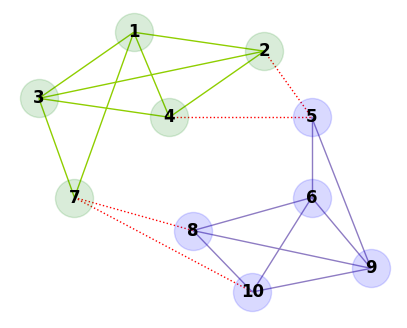

In [27]:
show_sparsest_cut(G, cut[0], cut[1])

## 3) Friendship paradox:

An interesting phenomenon in **social networks** is
that a random person’s expected degree is smaller than the degree of her peers:

` Your friends are more popular than you are!`

Given an undirected graph $G = (V,E)$:

Let $X$ be a random variable representing the degree of a randomly selected node in the graph\
and $Y$ be a random variable representing the average degree of its neighbors.



Prove that $𝐸[𝑋]≤𝐸[𝑌]$ :

The expected value of $X$ is:
$$ \mu =  E[X] = \frac{1}{|V|} \sum_{i\in V} d_i = \frac{2|E|}{|V|} $$

Where the *sum of the degrees of all nodes* equals twice the number of edges in the graph.\
While its variance:

$$ \sigma_X^2 =\sum_{i\in V}(d_i- \mu)^2 \frac{1}{|V|} =  
\frac{1}{|V|} \sum_{i\in V}(d_i^2 -2\mu d_i +\mu^2) $$

$$ = \frac{1}{|V|} \left[\sum_{i}d_i^2 -4\mu\text{|E|} + \mu^2|V|\right] =$$

$$  = \frac{\sum_{i}d_i^2}{|V|} -2\mu \frac{2|E|}{|V|} + \mu^2 = $$
$$ = \frac{\sum_{i}d_i^2}{|V|}  -2\mu^2 + \mu^2 = \frac{\sum_{i}d_i^2}{|V|}- \mu^2 = \sigma_X^2 $$


And expected value $E[Y]$ is:

$$ \mu_Y = E[Y] = \frac{1}{2|E|} \sum_{i\in V}  \sum_{j \in S_i} d_j = \frac{1}{2|E|} \sum_{i\in V} d_i^2 $$

From the variance formula above we have: $ \sum\limits_{i=1}^{|V|}d_i^2 = (\sigma_X^2+\mu^2)|V| $ so we can rewrite:

$$  \mu_Y = E[Y] = \frac{(\sigma_X^2+\mu^2)|V|}{2|E|} = \frac{(\sigma_X^2+\mu^2)}{\mu} = \mu + \frac{\sigma_X^2}{\mu} $$

This proves that:

$$ \ \mu \leq \mu + \frac{\sigma_X^2}{\mu} = \mu_Y $$


We have that $ E[X] = E[Y] $ when $ \frac{\sigma^2}{\mu} = 0 $, meaning $ \sigma^2 = 0 $

In this case the graph would be regular connected: each node has same degree of its neighboring nodes

Note: \
Average degree of the node’s neighbors $E[Y]$ used above can be obtained from the standard formula:

$$ E[Y] = \frac{1}{|V|} \sum_{i\in V}d_i \sum_{j \in S_i} d_j = $$

$$ = \frac{\sum_{i\in V} \sum_{j \in S_i} d_j}{\sum_{i\in V}d_i} = $$

$$ = \frac{1}{2|E|} \sum_{i\in V}  \sum_{j \in S_i} d_j $$


## 4)  Streaming Algorithm for Graph Connectivity:

A graph arrives as a stream of edges $ \mathcal{E} = e_1, e_2, $...\
Exactly one edge arrives at a time, with edge $e_i$ arriving at time $i$. Each edge $e_i$ consists on a pair of vertices $(u, v)$.

According to the **sliding window model** at each time $t$ only the $w$
most recent edges are considered active,  where $w$ is the window size.\
The graph that consists of the **active edges** at time $t$, given a window length $w$, is denoted with $ G(t,w) = (V,E(t,w)) $



To monitor the connectivity of the graph $G(t,w)$ I use a set of edges $C$ that represent a minimum path that connects all the nodes.

The tree defined by the edges in $C$ must remain **acyclic** at all times and should always consider the most recent edges arrived.\
The idea is that a cycle is redundant information for tracking the connectivity of a graph.

When a new edge arrives, I insert it into $C$ in any case and then check if it forms a cycle within $C$.\
If a cycle is detected, I remove the **oldest edge** from this cycle.\
To determine which edge is the oldest I need to keep records of the arrival timestamps of the edges in my set.\
For this reason the spatial complexity of the algorithm is $O(V + w)$.
And it is also motivated by the fact that the length of a minimum spanning tree connecting all the nodes of an undirected graph is $V-1$.

To check if a new edge closes a loop I used **DFS**, which is in fact the core of the algorithm and runs every time a new edge arrives.\
Time complexity for Depth First Search is $O(V + E)$ which therefore coincides with the update time of the streaming algorithm

In [28]:
def has_cycle(edges):

    adj = defaultdict(set) # defaultdict to avoid KeyError for missing keys
    path = []

    for x, y in edges:  # building graph as dict
        adj[x].add(y)
        adj[y].add(x)

    col = defaultdict(int) # visited vertex dict
    parent = {}            # parents dict

    def dfs(x, p):
        col[x] = 1     # mark visited vertex
        parent[x] = p  # mark parent of this vertex

        for y in adj[x]:
            if col[y] == 0:
                if dfs(y, x):  # recursive dfs if adj vertex is not visited
                    return True
            # if adj vertex is visited and not parent of current vertex
            elif col[y] == 1 and parent[x] != y:
                #print(f"cycle found: {y} -> ", end='')
                node = x
                path.append(y)
                while node != y:  # find all edges of the cycle
                    #print(f"{node} -> ", end='')
                    path.append(node)
                    node = parent[node]
                #print(f"{y} |", end='')
                return path
        col[x] = 2
        return None

    for x in adj:   # start loop on each vertex
        if col[x] == 0:
            if(dfs(x, None)) == True:
                return path
    return False  # return False if no cycle found

**To decide if the graph is connected**:\
After receiving a new edge at time $t+1$, the graph $G(t+1,w)$ is connected if, upon adding the edge to set $C$ as described above,\
there are no edges in $C$ with arrival timestamps older than $(t+1)-w$.

In [29]:
from Stream_edge import check_add_edge, do_edge_plot, do_gif

In [30]:
folder_path = "graph_status"
os.makedirs(folder_path, exist_ok=True)

In [31]:
## Quick simulation:

print()
stream_edge = [("c","e"), ("b","d"), ("a","c"), ("c","b"), ("a","b"),
               ("c","d"), ("d","e"), ("b","e"), ("b","d"), ("c","e")]

# first seven edges taken from the example provided in the assignment, the subsequent ones extracted randomly

F = []
arrival_time = {}
window_size = 5

window = []     # only needed for visualization
is_disconnected = False

times = range(1, 100)
for t in times:

    if t < len(stream_edge):
        new_edge = stream_edge[t-1]

    else:
        u = random.choice("abcde")
        v = random.choice("abcde")
        new_edge = (u,v)

        while check_add_edge(u,v, window) == False:
            u = random.choice("abcde")
            v = random.choice("abcde")
            new_edge = (u,v)

    print(f"\r t:{t:>2} - arrived: {new_edge}", end="", flush = True)

    arrival_time[new_edge] = t

    if (new_edge[0], new_edge[1]) not in F and (new_edge[1], new_edge[0]) not in F: F = [new_edge] + F
    else:
        this_frame = [t if t in F else (t[1], t[0]) for t in [new_edge]][0]
        arrival_time[this_frame] = t+1

    window.append(new_edge)
    cycle_path = has_cycle(F)

    if cycle_path:

        #print(f"cycle: {cycle_path}", end='')
        edge_path = [(cycle_path[i], cycle_path[i+1])
                    for i in range(len(cycle_path) - 1)] + [(cycle_path[-1], cycle_path[0])]

        # tuple manipulation to match edges in F
        loop = [t if t in F else (t[1], t[0]) for t in edge_path]

        oldest_edge_time = min(arrival_time[key] for key in  loop)
        oldest_edge = [key for key in  loop if arrival_time[key] == oldest_edge_time][0]
        #print(f"\r → removed: {oldest_edge} from t={oldest_edge_time}", flush=True)

        F.remove(oldest_edge)
        arrival_time.pop(oldest_edge)

    if len(window) > window_size: window.pop(0)

    if t-window_size >= min(arrival_time.values()):
        is_disconnected = True
        print(f" → Disconnected! ({t-window_size:>2},{min(arrival_time.values())})")

    do_edge_plot(F, window, t,folder_path, discon = is_disconnected)

do_gif(folder_path, times)


 t: 6 - arrived: ('c', 'd') → Disconnected! ( 1,1)
 t:10 - arrived: ('e', 'c') → Disconnected! ( 5,5)
 t:15 - arrived: ('a', 'c') → Disconnected! (10,10)
 t:19 - arrived: ('a', 'e') → Disconnected! (14,14)
 t:33 - arrived: ('b', 'd') → Disconnected! (28,28)
 t:46 - arrived: ('b', 'a') → Disconnected! (41,41)
 t:57 - arrived: ('d', 'a') → Disconnected! (52,52)
 t:58 - arrived: ('e', 'd') → Disconnected! (53,52)
 t:59 - arrived: ('b', 'e') → Disconnected! (54,52)
 t:81 - arrived: ('d', 'b') → Disconnected! (76,76)
 t:90 - arrived: ('b', 'e') → Disconnected! (85,85)
 t:94 - arrived: ('d', 'b') → Disconnected! (89,89)
 t:96 - arrived: ('c', 'a') → Disconnected! (91,91)
 t:97 - arrived: ('d', 'c') → Disconnected! (92,91)
 t:99 - arrived: ('a', 'b')

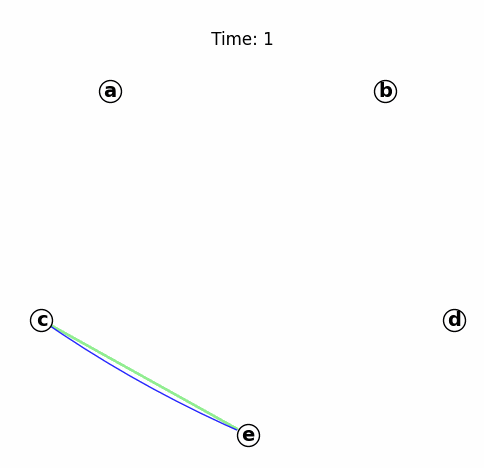

In [32]:
Image(open('streaming_algorithm.gif','rb').read())

# Visualization created to check that the algorithm is working well at each timestamp

## 5) Opinion-formation model with back-fire

Given an undirected weighted graph $ G = (V, E) $ where the set of nodes $ V = \{1, 2, ... , n\} $ represents entities of a social network and the edges between nodes their contacts, with each node characterized by an opinion expressed as a number in range
$ [0,1] $, to implement an opinion formation model that incorporates the **back-fire effect** I would use the opinions themselves to determine the weight of the edges.

The idea involves assigning negative weights to the edges connecting nodes whose opinions differ by more than a specified threshold $t$.

Edge weights can be computed with: $  w_{ij}^{t} = -(x_i^{t}x_j^{t}) $ when $ x_i^{t}-x_j^{t} > t $ and $  w_{ij}^{t} = x_i^{t} x_j^{t} $ otherwise

Given the **DeGroot model** update rule, where node $ i $ updates its opinion by:

$$ x_i^{(t + 1)} = x_i^{t} + \frac{\sum_{j \in N(i)} w_{ij} x_j^{t}}{\sum_{j \in N(i)} w_{ij}} $$

When $ w_{ij} < 0 $ having a negative weight in the denominator makes it smaller and increases the overall result, pushing node $i$ to radicalize its opinion and this should lead to the back fire.

However at this point there is a problem of normalization and the risk of having negative opinions that don't make much sense...

## 6) Graph Neural Networks:

In [33]:
! pip -q install torch_geometric

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 5.1 MB/s eta 0:00:00


In [34]:
import torch

import torch_geometric.transforms as T
from torch_geometric.utils import to_networkx
from torch_geometric.datasets import Planetoid

In [35]:
torch.manual_seed(42)

In [36]:
dataset = Planetoid(root='/tmp/Pubmed', name='Pubmed', force_reload=True)  # split = "full"

Processing...
Done!


In [37]:
graph = dataset[0]
graph

Data(x=[19717, 500], edge_index=[2, 88648], y=[19717], train_mask=[19717], val_mask=[19717], test_mask=[19717])

In [38]:
g = to_networkx(graph, node_attrs=['x'])

avg_degre = 2*g.number_of_edges() / g.number_of_nodes()
#avg_degre = sum(dict(g.degree()).values()) / g.number_of_nodes()

clustering_coef = nx.average_clustering(g)

print(f'Number of nodes (publications): {graph.num_nodes:>8}')
print(f'Number of edges (citation links): {graph.num_edges:>6}')
print(f'Average citations per publication: {round(avg_degre, 3)}')
print(f'Clustering coefficient: {round(clustering_coef, 3):>15}')

Number of nodes (publications):    19717
Number of edges (citation links):  88648
Average citations per publication: 8.992
Clustering coefficient:            0.06


In [39]:
degree_distrib = nx.degree_histogram(g)
nodes = [i for i in range(0, len(degree_distrib))]

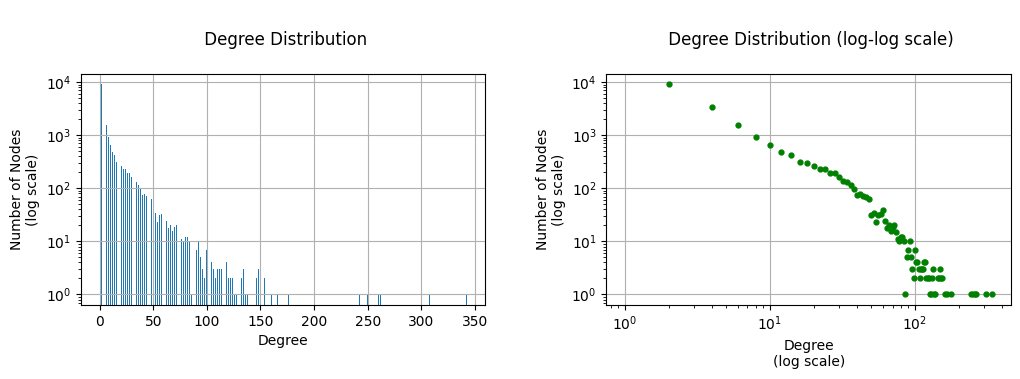

In [40]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(12, 3))

ax1.bar(nodes, degree_distrib)
ax1.set_title('\n Degree Distribution\n')
ax1.set_xlabel('Degree\n')
ax1.set_ylabel('Number of Nodes\n(log scale)')
ax1.set_yscale("log");
ax1.grid()

ax2.plot(nodes, degree_distrib, 'o', markersize=3.5, color='green')
ax2.set_title('\n Degree Distribution (log-log scale)\n')
ax2.set_xlabel('Degree\n(log scale)')
ax2.set_ylabel('Number of Nodes\n(log scale)')
ax2.set_xscale("log"); ax2.set_yscale("log")
ax2.grid()

plt.subplots_adjust(wspace=0.3)
plt.show()

In [41]:
## Class distribution

class_distribution = sorted(Counter(graph.y.tolist()).items())
class_dict = {cls: count for cls, count in class_distribution}

print(f'Class distribution: {class_dict}')

Class distribution: {0: 4103, 1: 7739, 2: 7875}


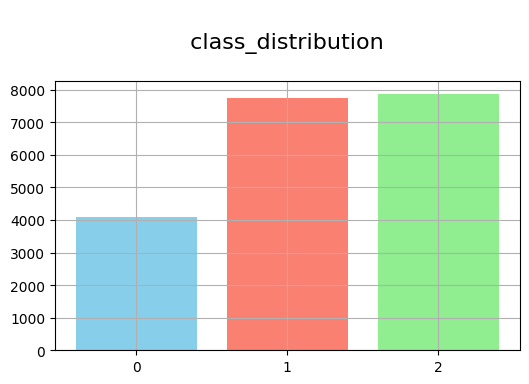

In [42]:
plt.figure(figsize=(6, 3.5))
plt.bar(class_dict.keys(), class_dict.values(), color=['skyblue', 'salmon', 'lightgreen'])
plt.title("\n class_distribution \n", fontsize= 16)
plt.xticks(list(class_dict.keys()))
plt.grid(); plt.show()

#### Node Classification:

Neural Networks are imported from an external module.

They all consist of two layers with hidden dimensions of 256 and 16, plus a final linear layer for the classification into the three classes.\
The activation function chosen is the `Tanh` followed by the addition of a dropout layer.

The results obtained are good, as all networks, trained over 25 epochs, have surpassed the proposed benchmark.

A table comparing the performance of the networks is provided below

In [43]:
from Graph_NN import GConv_Network, GAT_Network, SAGE_Network
from Graph_NN import train_node_classifier, eval_node_classifier
from Graph_NN import do_plot

In [44]:
if torch.cuda.is_available(): device = "cuda:0"
else: device = "cpu"

print(f'Using device {torch.device(device)}')

Using device cuda:0


In [45]:
# train, validation and test split

split = T.RandomNodeSplit(num_val=0.2, num_test=0.1)
graph = split(graph).to(device)

In [46]:
# hyperparameters

lr = 0.01
wd = 5e-4
n_epochs = 25


 >> Training...

GConv_Network(
  (conv1): GCNConv(500, 256)
  (conv2): GCNConv(256, 16)
  (out): Linear(in_features=16, out_features=3, bias=True)
) 

 Epoch [ 2/25] | Loss: 1.0748 | Val_loss 1.0753 | Val_acc 0.556 - 
 Epoch [ 4/25] | Loss: 1.0449 | Val_loss 1.0476 | Val_acc 0.614 - 
 Epoch [ 6/25] | Loss: 1.0074 | Val_loss 1.0109 | Val_acc 0.625 - 
 Epoch [ 8/25] | Loss: 0.9593 | Val_loss 0.9627 | Val_acc 0.667 - 
 Epoch [10/25] | Loss: 0.8981 | Val_loss 0.9021 | Val_acc 0.781 - 
 Epoch [12/25] | Loss: 0.8420 | Val_loss 0.8471 | Val_acc 0.815 - 
 Epoch [14/25] | Loss: 0.7992 | Val_loss 0.8042 | Val_acc 0.828 - 
 Epoch [16/25] | Loss: 0.7711 | Val_loss 0.7781 | Val_acc 0.833 - 
 Epoch [18/25] | Loss: 0.7499 | Val_loss 0.7592 | Val_acc 0.846 - 
 Epoch [20/25] | Loss: 0.7370 | Val_loss 0.7391 | Val_acc 0.855 - 
 Epoch [22/25] | Loss: 0.7290 | Val_loss 0.7301 | Val_acc 0.862 - 
 Epoch [24/25] | Loss: 0.7232 | Val_loss 0.7280 | Val_acc 0.863 - 



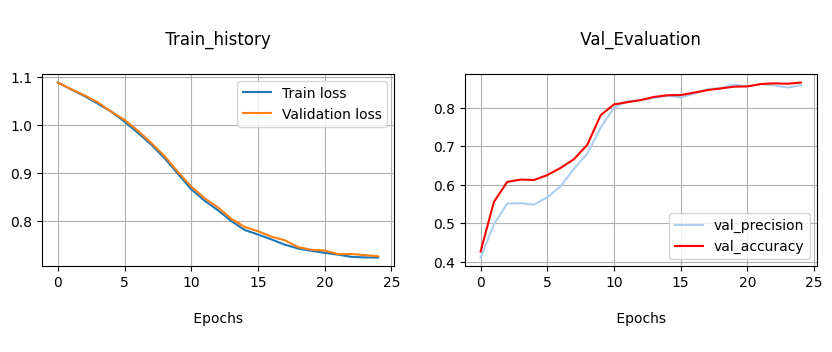


 Test accuracy: 0.874% 



In [47]:
model = GConv_Network(dataset).to(device)

optimizer = torch.optim.Adam(model.parameters(), lr=lr, weight_decay=wd)
criterion = torch.nn.CrossEntropyLoss()

model, train_lss_curve, val_lss_curve, evaluation = train_node_classifier(model, graph,
                                                                          optimizer, criterion,
                                                                          n_epochs)
do_plot(n_epochs, train_lss_curve, val_lss_curve, evaluation)

CONV_results = eval_node_classifier(model, graph, graph.test_mask, is_test=True)

print(f'\n Test accuracy: {CONV_results[0]:.3f}% \n')  # 0.874%


 >> Training...

GAT_Network(
  (conv1): GATConv(500, 256, heads=1)
  (conv2): GATConv(256, 16, heads=1)
  (out): Linear(in_features=16, out_features=3, bias=True)
) 

 Epoch [ 2/25] | Loss: 1.0831 | Val_loss 1.0835 | Val_acc 0.491 - 
 Epoch [ 4/25] | Loss: 1.0479 | Val_loss 1.0480 | Val_acc 0.516 - 
 Epoch [ 6/25] | Loss: 1.0090 | Val_loss 1.0117 | Val_acc 0.629 - 
 Epoch [ 8/25] | Loss: 0.9627 | Val_loss 0.9678 | Val_acc 0.658 - 
 Epoch [10/25] | Loss: 0.8982 | Val_loss 0.9035 | Val_acc 0.790 - 
 Epoch [12/25] | Loss: 0.8530 | Val_loss 0.8537 | Val_acc 0.796 - 
 Epoch [14/25] | Loss: 0.8073 | Val_loss 0.8123 | Val_acc 0.812 - 
 Epoch [16/25] | Loss: 0.7828 | Val_loss 0.7898 | Val_acc 0.825 - 
 Epoch [18/25] | Loss: 0.7633 | Val_loss 0.7735 | Val_acc 0.830 - 
 Epoch [20/25] | Loss: 0.7476 | Val_loss 0.7495 | Val_acc 0.843 - 
 Epoch [22/25] | Loss: 0.7389 | Val_loss 0.7416 | Val_acc 0.840 - 
 Epoch [24/25] | Loss: 0.7286 | Val_loss 0.7337 | Val_acc 0.856 - 



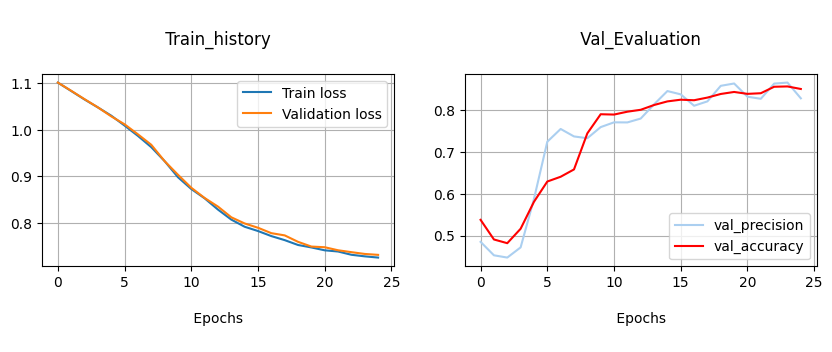


 Test accuracy: 0.861% 



In [48]:
model = GAT_Network(dataset).to(device)

optimizer = torch.optim.Adam(model.parameters(), lr=lr, weight_decay=wd)
criterion = torch.nn.CrossEntropyLoss()

model, train_lss_curve, val_lss_curve, evaluation = train_node_classifier(model, graph,
                                                                          optimizer, criterion,
                                                                          n_epochs)
do_plot(n_epochs, train_lss_curve, val_lss_curve, evaluation)

GAT_results = eval_node_classifier(model, graph, graph.test_mask, is_test=True)

print(f'\n Test accuracy: {GAT_results[0]:.3f}% \n')  # 0.861%


 >> Training...

SAGE_Network(
  (conv1): SAGEConv(500, 256, aggr=mean)
  (conv2): SAGEConv(256, 16, aggr=mean)
  (out): Linear(in_features=16, out_features=3, bias=True)
) 

 Epoch [ 2/25] | Loss: 1.0714 | Val_loss 1.0735 | Val_acc 0.506 - 
 Epoch [ 4/25] | Loss: 1.0120 | Val_loss 1.0140 | Val_acc 0.669 - 
 Epoch [ 6/25] | Loss: 0.8999 | Val_loss 0.9072 | Val_acc 0.771 - 
 Epoch [ 8/25] | Loss: 0.8340 | Val_loss 0.8409 | Val_acc 0.790 - 
 Epoch [10/25] | Loss: 0.7863 | Val_loss 0.7951 | Val_acc 0.813 - 
 Epoch [12/25] | Loss: 0.7642 | Val_loss 0.7737 | Val_acc 0.817 - 
 Epoch [14/25] | Loss: 0.7442 | Val_loss 0.7535 | Val_acc 0.838 - 
 Epoch [16/25] | Loss: 0.7328 | Val_loss 0.7402 | Val_acc 0.851 - 
 Epoch [18/25] | Loss: 0.7198 | Val_loss 0.7282 | Val_acc 0.846 - 
 Epoch [20/25] | Loss: 0.7159 | Val_loss 0.7273 | Val_acc 0.856 - 
 Epoch [22/25] | Loss: 0.7116 | Val_loss 0.7167 | Val_acc 0.858 - 
 Epoch [24/25] | Loss: 0.7045 | Val_loss 0.7170 | Val_acc 0.862 - 




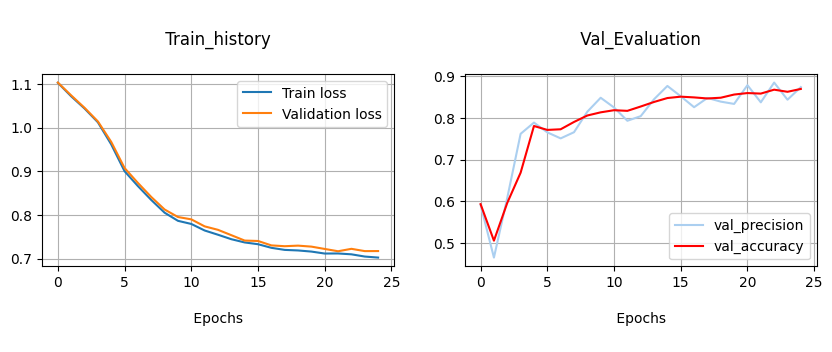


 Test accuracy: 0.881% 



In [49]:
model = SAGE_Network(dataset).to(device)

optimizer = torch.optim.Adam(model.parameters(), lr=lr, weight_decay=wd)
criterion = torch.nn.CrossEntropyLoss()

model, train_lss_curve, val_lss_curve, evaluation = train_node_classifier(model, graph,
                                                                          optimizer, criterion,
                                                                          n_epochs)

print()
do_plot(n_epochs, train_lss_curve, val_lss_curve, evaluation)

SAGE_results = eval_node_classifier(model, graph, graph.test_mask, is_test=True)

print(f'\n Test accuracy: {SAGE_results[0]:.3f}% \n')  # 0.881%

In [50]:
df = pd.DataFrame(data = [CONV_results, GAT_results, SAGE_results],
                  columns = ['Accuracy', 'Precision', 'Recall', "F1-score"])

df.index.names = ['Models:']
df = df.rename({0: "GraphCONV", 1: 'GraphATT', 2: 'GraphSAGE'})

df.style.highlight_max(color = 'lightgreen', axis = 0).format(precision=3)

# GraphSAGE: 0.881, 0.881, 0.938, 0.909

,Accuracy,Precision,Recall,F1-score
Models:,,,,
GraphCONV,0.874,0.870,0.933,0.900
GraphATT,0.861,0.841,0.935,0.886
GraphSAGE,0.881,0.881,0.938,0.909


The neural network employing the SAGEConv layer is confirmed as the best one in all the metrics considered.

#### Link Prediction:

In [51]:
from torch_geometric.nn import GCNConv
from torch_geometric.utils import negative_sampling

from sklearn.metrics import roc_auc_score, f1_score

In [52]:
class Net(torch.nn.Module):

  def __init__(self, in_channels, hidden_channels, out_channels):

    super().__init__()
    self.conv1 = GCNConv(in_channels, hidden_channels)
    self.conv2 = GCNConv(hidden_channels, out_channels)

  def encode(self, x, edge_index):
    x = self.conv1(x, edge_index).relu()
    x = self.conv2(x,edge_index)
    return x

  def decode(self, z, edge_label_index):
    # product of a pair of nodes on each edge
	  return (z[edge_label_index[0]] * z[edge_label_index[1]]).sum(dim=-1)

  def decode_all(self, z):
    prob_adj = z @ z.t()
    return (prob_adj > 0).nonzero(as_tuple=False).t()

In [53]:
def train_link_predictor(model, train_data, val_data, optimizer, criterion, n_epochs=100):

  # Initialize lists to track the loss on training data and AUC on validation data
  train_lss_curve = []; val_auc_curve		= []; val_f1_curve = []

  print("\n >> Training...\n")

  for epoch in range(1, n_epochs + 1):
    model.train()
    optimizer.zero_grad()

		# Compute node embeddings using the encode function of the model
    z = model.encode(train_data.x, train_data.edge_index)

		# Dynamically sample negative edges (edges that are not present in the graph)
    neg_edge_index = negative_sampling(
				edge_index = train_data.edge_index,
				num_nodes = train_data.num_nodes,
				num_neg_samples = train_data.edge_label_index.size(1),
				method='sparse')

		# Combine real and negative edges
    edge_label_index = torch.cat([train_data.edge_label_index, neg_edge_index],dim=-1)

		# Create labels for real edges (1) and negative edges (0)
    edge_label = torch.cat([train_data.edge_label,
                            train_data.edge_label.new_zeros(neg_edge_index.size(1))], dim=0)

		# Decode the embeddings to predict the presence of edges
    out	= model.decode(z, edge_label_index).view(-1)

    loss = criterion(out, edge_label)
    train_lss_curve.append(loss.item())

    loss.backward()
    optimizer.step()

    val_auc, f1_val = eval_link_predictor(model, val_data)
    val_auc_curve.append(val_auc.item())
    val_f1_curve.append(f1_val.item())

    if epoch % 10 == 0:
      print(f" Epoch [{epoch:>3}/{n_epochs}] | Train_loss: {loss:.3f} | Val_AUC: {val_auc:.3f} | Val_F1: {f1_val:.3f}")

  return model, (train_lss_curve, val_auc_curve, val_f1_curve)


@torch.no_grad()
def eval_link_predictor(model, data, is_test=False):

    model.eval()
    z 	= model.encode(data.x, data.edge_index)
    out = model.decode(z, data.edge_label_index).view(-1).sigmoid()

    roc_auc = roc_auc_score(data.edge_label.cpu().numpy(), out.cpu().numpy())
    y_pred = np.where(out.cpu().numpy() >= 0.5, 1, 0)
    f1 = f1_score(data.edge_label.cpu().numpy(), y_pred)

    return roc_auc, f1

In [54]:
split = T.RandomLinkSplit(
	num_val=0.1,
	num_test=0.1,
	is_undirected=True,
	add_negative_train_samples=False,
	neg_sampling_ratio=1.0)

train_data, val_data, test_data = split(graph)

In [55]:
n_epochs = 100

model = Net(dataset.num_features, 128, 64).to(device)

optimizer = torch.optim.Adam(params=model.parameters(), lr=lr, weight_decay=wd)
criterion = torch.nn.BCEWithLogitsLoss()

model, curves = train_link_predictor(model, train_data.to(device), val_data.to(device),
                                     optimizer, criterion, n_epochs)



 >> Training...

 Epoch [ 10/100] | Train_loss: 0.657 | Val_AUC: 0.752 | Val_F1: 0.667
 Epoch [ 20/100] | Train_loss: 0.611 | Val_AUC: 0.885 | Val_F1: 0.724
 Epoch [ 30/100] | Train_loss: 0.550 | Val_AUC: 0.841 | Val_F1: 0.745
 Epoch [ 40/100] | Train_loss: 0.529 | Val_AUC: 0.893 | Val_F1: 0.762
 Epoch [ 50/100] | Train_loss: 0.504 | Val_AUC: 0.904 | Val_F1: 0.767
 Epoch [ 60/100] | Train_loss: 0.484 | Val_AUC: 0.909 | Val_F1: 0.777
 Epoch [ 70/100] | Train_loss: 0.484 | Val_AUC: 0.913 | Val_F1: 0.781
 Epoch [ 80/100] | Train_loss: 0.476 | Val_AUC: 0.915 | Val_F1: 0.780
 Epoch [ 90/100] | Train_loss: 0.478 | Val_AUC: 0.917 | Val_F1: 0.781
 Epoch [100/100] | Train_loss: 0.480 | Val_AUC: 0.918 | Val_F1: 0.781


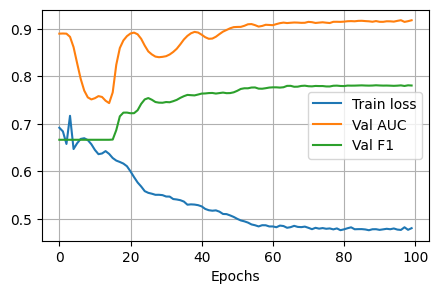

In [56]:
plt.figure(figsize=(5,3))
plt.plot(range(n_epochs), curves[0], label='Train loss')
plt.plot(range(n_epochs), curves[1], label='Val AUC')
plt.plot(range(n_epochs), curves[2], label='Val F1')
plt.xlabel('Epochs')
plt.legend(); plt.grid()
plt.show()

In [57]:
test_roc_auc, test_f1 = eval_link_predictor(model, test_data)

print(f'\nTest:')
print(f'  ROC_AUC: {test_roc_auc:.3f} %')   # ROC_AUC: 0.924 %
print(f' F1_score: {test_f1:.3f} %')        #      F1: 0.789 %


Test:
  ROC_AUC: 0.926 %
 F1_score: 0.782 %


-------------------------------------------------
<br/><br/>

In [61]:
!zip -r -q /content/Social_Networks_HW.zip /content/Social_Networks/Homework